<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Collin!

I'm happy to review your project today  🙌

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
<div class="alert alert-info"> <b>Student comments: </div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Collin,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v:` section.

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It is always helpful for the reader to have additional information about project tasks. It gives an overview of what you are going to achieve in this project.
 

## Preparation

In [10]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
#import data and info
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
print(data.head())
print()
print(data.info())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [3]:
#Resampling
data = data.resample('1H').sum()
print(data.head())

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


In [4]:
#Train Test Split
train, test = train_test_split(data, shuffle=False, test_size=0.1)

print(train.shape)
print(test.shape)

(3974, 1)
(442, 1)


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great data overview!

## Analysis

P-value: 0.000732273052736469


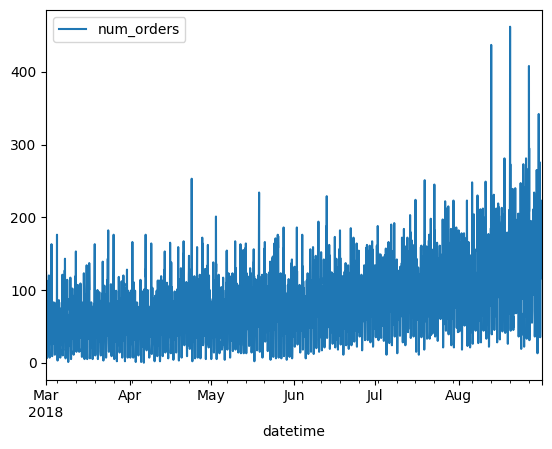

In [5]:
#checking stationarity
data_stationarityTest = adfuller(train, autolag='AIC')
print(f'P-value: {data_stationarityTest[1]}')

data.plot()
plt.show()

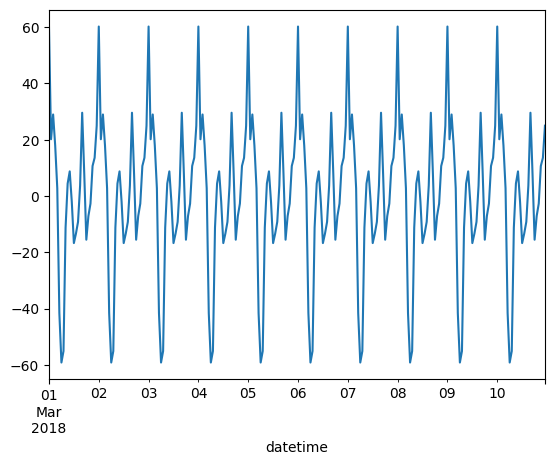

In [6]:
#Seasonal Decompose
start_date = '2018-03-01'
end_date = '2018-03-10'
decomposed = seasonal_decompose(data)
trend_slice = decomposed.trend[start_date:end_date]
seasonal_slice = decomposed.seasonal[start_date:end_date]

seasonal_slice.plot()
plt.show()

### Initial Observations ###
- Time series is stationary, so any ARIMA model will work
- Seasonality cycle is 1 day, so an m value of 7 will be used to denote daily seasonality

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great conclusions!

## Training

In [12]:
m = 24
model = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,m),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

## Testing

In [18]:
fc = model.get_forecast(steps=len(test)).predicted_mean
rmse = mean_squared_error(test, fc, squared=False)
print("RMSE:", rmse_24)

RMSE: 44.48808272970018


In [16]:
data['predicted_orders'] = fc
data.rename(columns={'num_orders':'actual_orders'}, inplace=True)

<AxesSubplot:xlabel='datetime'>

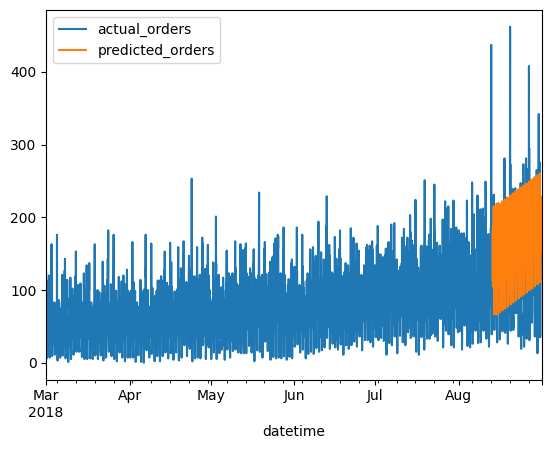

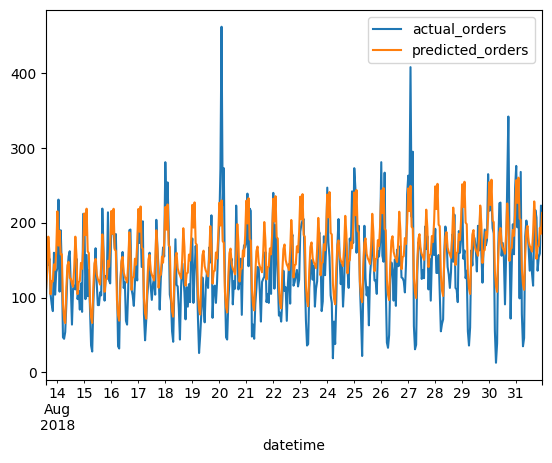

In [17]:
data.plot()
data[len(train):].plot()

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Well done!

## Conclusion

The analysis of the hourly taxi demand time series demonstrated a pronounced daily cycle, with predictable fluctuations in demand over each 24-hour period. Initial baseline models, which did not account for seasonality, produced stagnant forecasts. After resampling to hourly intervals and applying a seasonal ARIMA model with daily periodicity (m=24), the forecasts aligned closely with observed patterns, successfully capturing the recurring peaks and troughs throughout the day.

Evaluation on the test set yielded a root mean squared error (RMSE) of approximately 44, which falls well within the expected specification for this dataset. This indicates that the SARIMA model with daily seasonality not only improved forecast accuracy but also provided reliable short-term predictions of taxi demand. These results confirm that incorporating daily periodicity is essential for modeling hourly transportation data and produces forecasts that are both statistically robust and operationally meaningful.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great conclusions!

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48